<a href="https://colab.research.google.com/github/i-ganza007/Multimodal-Data-Preprocessing/blob/main/Sound_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import librosa as lb
import pydub
import matplotlib.pyplot as plt

In [4]:
y_confirm_eddy , sr_confirm_eddy = lb.load('/content/confirm_eddy.mp3')
y_confirm_lievin , sr_confirm_lievin = lb.load('/content/confirm_lievin.mp3')
y_approve_eddy , sr_approve_eddy = lb.load('/content/yes_approve_eddy.mp3')
y_approve_lievin , sr_approve_lievin = lb.load('/content/yes_approve_lievin.mp3')

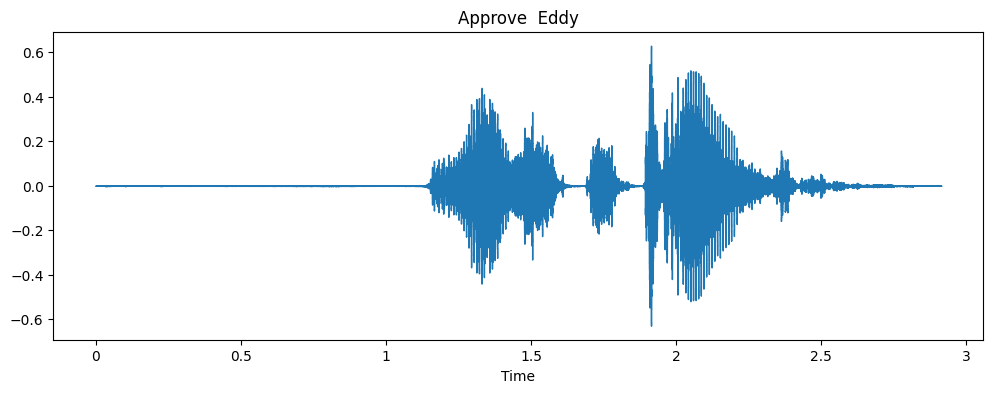

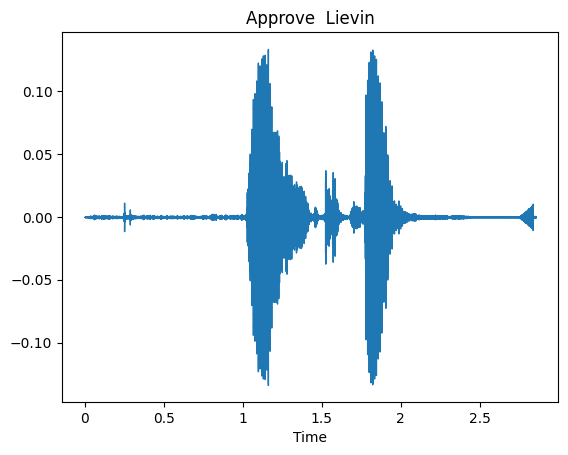

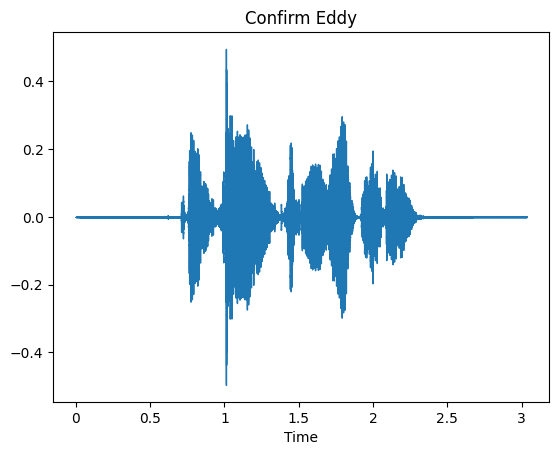

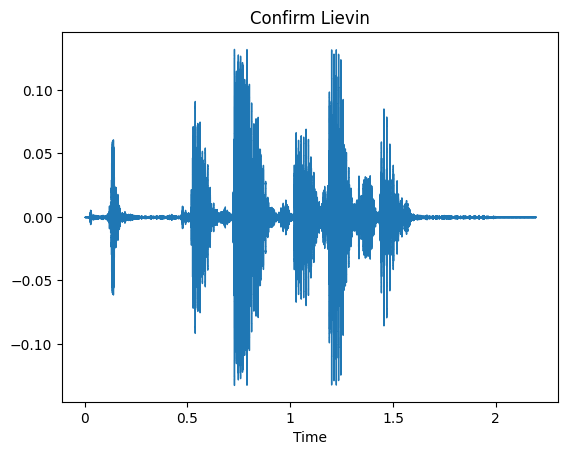

In [7]:
y_confirm_eddy_sr =  sr_confirm_eddy
y_confirm_lievin_sr = sr_confirm_lievin
y_approve_eddy_sr = sr_approve_eddy
y_approve_lievin_sr = sr_approve_lievin
plt.figure(figsize=(12, 4))
# WaveForms
lb.display.waveplot(y_approve_eddy, sr=y_approve_eddy_sr)
plt.title('Approve  Eddy')
plt.show()

lb.display.waveplot(y_approve_lievin, sr=y_approve_lievin_sr)
plt.title('Approve  Lievin')
plt.show()

lb.display.waveplot(y_confirm_eddy, sr=y_confirm_eddy_sr)
plt.title('Confirm Eddy')
plt.show()

lb.display.waveplot(y_confirm_lievin, sr=y_confirm_lievin_sr)
plt.title('Confirm Lievin')
plt.show()

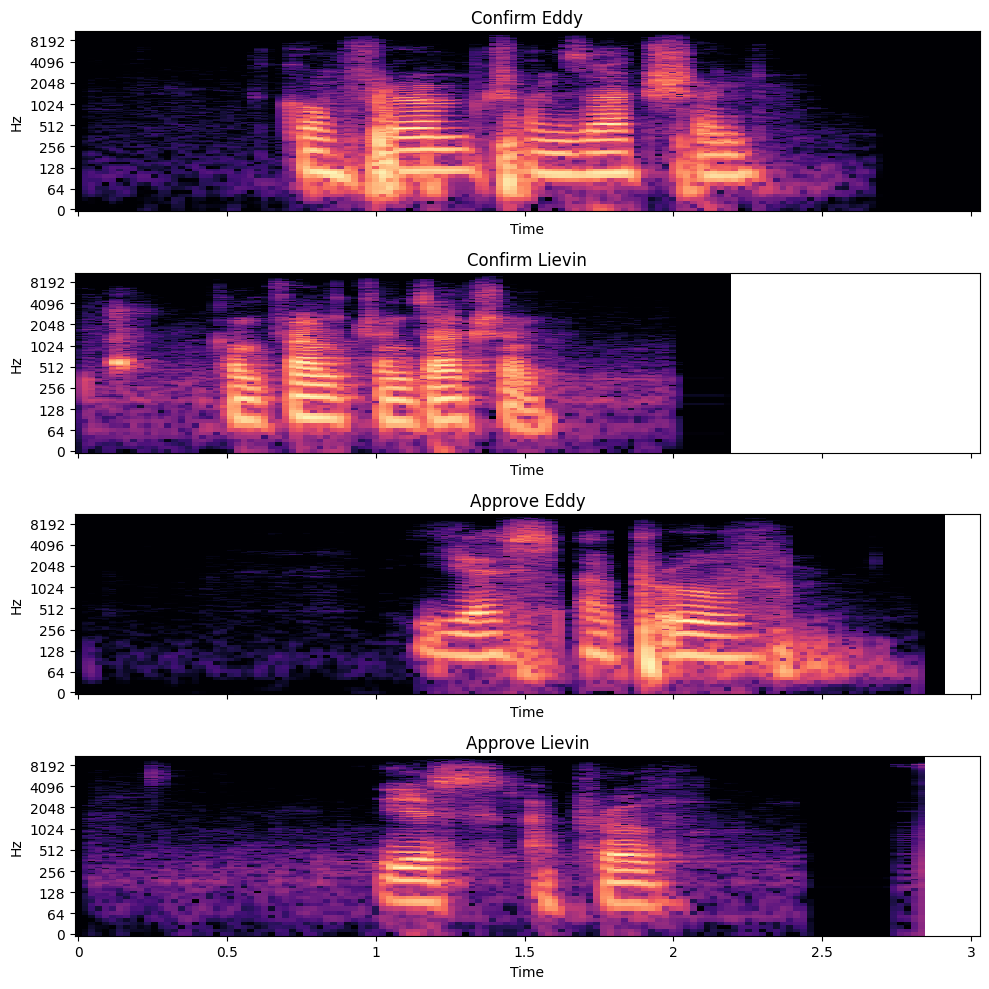

In [11]:
import numpy as np
D_confirm_eddy = lb.stft(y_confirm_eddy)
D_confirm_lievin = lb.stft(y_confirm_lievin)
D_approve_eddy = lb.stft(y_approve_eddy)
D_approve_lievin = lb.stft(y_approve_lievin)
fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(10, 10))

lb.display.specshow(lb.amplitude_to_db(np.abs(D_confirm_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Confirm Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_confirm_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Confirm Lievin')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_approve_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Approve Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_approve_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Approve Lievin')

plt.tight_layout()
plt.show()


In [19]:
# Trimming the audio to remove the silence
yt_confirm_eddy , index_confirm_eddy = lb.effects.trim(y_confirm_eddy)
yt_confirm_lievin , index_confirm_lievin = lb.effects.trim(y_confirm_lievin)
yt_approve_eddy , index_approve_eddy = lb.effects.trim(y_approve_eddy)
yt_approve_lievin , index_approve_lievin = lb.effects.trim(y_approve_lievin)
print(lb.get_duration(y=yt_confirm_eddy, sr=sr_confirm_eddy))
print(lb.get_duration(y=yt_confirm_lievin, sr=sr_confirm_lievin))
print(lb.get_duration(y=yt_approve_eddy, sr=sr_approve_eddy))
print(lb.get_duration(y=yt_approve_lievin, sr=sr_approve_lievin))
print('Before')
print(lb.get_duration(y=y_confirm_eddy, sr=sr_confirm_eddy))
print(lb.get_duration(y=y_confirm_lievin, sr=sr_approve_lievin))
print(lb.get_duration(y=y_approve_eddy, sr=sr_approve_eddy))
print(lb.get_duration(y=y_approve_lievin, sr=sr_confirm_lievin))


2.670294784580499
2.043356009070295
2.8792743764172335
2.8535147392290248
Before
3.033514739229025
2.193514739229025
2.913514739229025
2.8535147392290248


In [17]:
# Pitch Shifting
y_shifted_confirm_eddy = lb.effects.pitch_shift(y_confirm_eddy, sr=sr_confirm_eddy, n_steps=4)
y_shifted_confirm_lievin = lb.effects.pitch_shift(y_confirm_lievin, sr=sr_confirm_lievin, n_steps=4)
y_shifted_approve_eddy = lb.effects.pitch_shift(y_approve_eddy, sr=sr_approve_eddy, n_steps=4)
y_shifted_approve_lievin = lb.effects.pitch_shift(y_approve_lievin, sr=sr_approve_lievin, n_steps=4)

In [22]:
# Feature Extraction MFCC
mfcc_confirm_eddy = lb.feature.mfcc(y=y_confirm_eddy, sr=sr_confirm_eddy)
mfcc_confirm_lievin = lb.feature.mfcc(y=y_confirm_lievin, sr=sr_confirm_lievin)
mfcc_approve_eddy = lb.feature.mfcc(y=y_approve_eddy, sr=sr_approve_eddy)
mfcc_approve_lievin = lb.feature.mfcc(y=y_approve_lievin, sr=sr_approve_lievin)

In [23]:
print(mfcc_confirm_eddy.shape)
print(mfcc_confirm_lievin.shape)
print(mfcc_approve_eddy.shape)
print(mfcc_approve_lievin.shape)

(20, 131)
(20, 95)
(20, 126)
(20, 123)


In [24]:
# Spectral Roll Off
spectral_rolloff_confirm_eddy = lb.feature.spectral_rolloff(y=y_confirm_eddy, sr=sr_confirm_eddy)
spectral_rolloff_confirm_lievin = lb.feature.spectral_rolloff(y=y_confirm_lievin, sr=sr_confirm_lievin)
spectral_rolloff_approve_eddy = lb.feature.spectral_rolloff(y=y_approve_eddy, sr=sr_approve_eddy)
spectral_rolloff_approve_lievin = lb.feature.spectral_rolloff(y=y_approve_lievin, sr=sr_approve_lievin)